#        Breast Cancer Detection 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbrn

import pickle
from joblib import dump, load


%matplotlib inline


# first of All Lets Analyze Our Data 

In [2]:
data_path = "DATASET\Breast_Cancer_dataset.csv"
df = pd.read_csv(data_path)

df.sample(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
351,899667,M,15.75,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,...,24.17,119.40,915.3,0.1550,0.5046,0.68720,0.21350,0.4245,0.10500,NaN
121,86517,M,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.08665,...,24.90,145.40,1549.0,0.1503,0.2291,0.32720,0.16740,0.2894,0.08456,NaN
437,909220,B,14.04,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,...,21.58,101.20,750.0,0.1195,0.1252,0.11170,0.07453,0.2725,0.07234,NaN
310,893783,B,11.70,19.11,74.33,418.7,0.08814,0.05253,0.01583,0.01148,...,26.55,80.92,483.1,0.1223,0.1087,0.07915,0.05741,0.3487,0.06958,NaN
277,8911670,M,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,...,24.30,129.00,1236.0,0.1243,0.1160,0.22100,0.12940,0.2567,0.05737,NaN
156,8711202,M,17.68,20.74,117.40,963.7,0.11150,0.16650,0.18550,0.10540,...,25.11,132.90,1302.0,0.1418,0.3498,0.35830,0.15150,0.2463,0.07738,NaN
460,911296201,M,17.08,27.15,111.20,930.9,0.09898,0.11100,0.10070,0.06431,...,34.49,152.10,1648.0,0.1600,0.2444,0.26390,0.15550,0.3010,0.09060,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
print(len(df.columns))

33


In [5]:
df.shape

(569, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
np.transpose(df.describe())

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [9]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

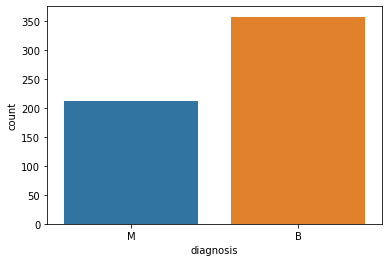

In [12]:
sbrn.countplot(x="diagnosis", data = df)

In [13]:
df.corr().T

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [14]:
df.drop(["id","Unnamed: 32"], axis = 1, inplace = True)
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
231,B,11.32,27.08,71.76,395.7,0.06883,0.03813,0.01633,0.003125,0.1869,...,12.08,33.75,79.82,452.3,0.09203,0.1432,0.1089,0.02083,0.2849,0.07087
121,M,18.66,17.12,121.40,1077.0,0.10540,0.11000,0.14570,0.086650,0.1966,...,22.25,24.90,145.40,1549.0,0.15030,0.2291,0.3272,0.16740,0.2894,0.08456
87,M,19.02,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.082710,0.1953,...,24.56,30.41,152.90,1623.0,0.12490,0.3206,0.5755,0.19560,0.3956,0.09288
25,M,17.14,16.40,116.00,912.7,0.11860,0.22760,0.22290,0.140100,0.3040,...,22.25,21.40,152.40,1461.0,0.15450,0.3949,0.3853,0.25500,0.4066,0.10590
507,B,11.06,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.042680,0.1954,...,11.69,20.74,76.08,411.1,0.16620,0.2031,0.1256,0.09514,0.2780,0.11680


In [15]:
print(len(df.columns)) ; print() ; print(df.shape)

31

(569, 31)


In [16]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [17]:
df.replace("M", 1, inplace = True)
df.replace("B", 0, inplace = True)

In [18]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
74,0,12.31,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,...,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
275,0,11.89,17.36,76.20,435.6,0.12250,0.07210,0.05929,0.07404,0.2015,...,12.40,18.99,79.46,472.4,0.1359,0.08368,0.07153,0.08946,0.2220,0.06033
255,1,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,...,16.39,22.07,108.10,826.0,0.1512,0.32620,0.32090,0.13740,0.3068,0.07957
527,0,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,...,13.61,19.27,87.22,564.9,0.1292,0.20740,0.17910,0.10700,0.3110,0.07592
90,0,14.62,24.02,94.57,662.7,0.08974,0.08606,0.03102,0.02957,0.1685,...,16.11,29.11,102.90,803.7,0.1115,0.17660,0.09189,0.06946,0.2522,0.07246


In [19]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [20]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [21]:
df["diagnosis"].unique()

array([1, 0], dtype=int64)

# Selecting our XS and The Target as well !!

In [22]:
XS = df.drop('diagnosis', axis=1)
Y = df["diagnosis"].values

XS.sample(4)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
215,13.86,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.05602,0.2106,0.06916,...,15.75,26.93,104.40,750.1,0.1460,0.4370,0.4636,0.1654,0.3630,0.10590
433,18.82,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.08744,0.1943,0.06132,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.1708,0.3007,0.08314
523,13.71,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,15.11,25.63,99.43,701.9,0.1425,0.2566,0.1935,0.1284,0.2849,0.09031
237,20.48,21.46,132.50,1306.0,0.08355,0.08348,0.09042,0.06022,0.1467,0.05177,...,24.22,26.17,161.70,1750.0,0.1228,0.2311,0.3158,0.1445,0.2238,0.07127


# Spliting The Data into Training and testing sets !!

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(XS, Y, test_size = 0.25, random_state = 10)

print(x_train.shape) ; print(x_test.shape)
print(y_train.shape) ; print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


# Processing 

In [24]:
from sklearn import preprocessing
Standard_S = preprocessing.StandardScaler()

x_train = Standard_S.fit_transform(x_train)
x_test = Standard_S.transform(x_test)

# Modelling 

In [25]:
def Models(x_train, y_train)  :
    
    from sklearn.linear_model import LogisticRegression
    LOGST_R = LogisticRegression(max_iter = 1000, random_state = 10)
    LOGST_R.fit(x_train, y_train)
    
    from sklearn import ensemble 
    RandomForest_C = ensemble.RandomForestClassifier(n_estimators  = 11 ,random_state = 0, criterion ="entropy")
    RandomForest_C.fit(x_train, y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    KNN_C = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2).fit(x_train, y_train)
    
    from sklearn import svm
    SVM_Classifier = svm.SVC(kernel = 'rbf', random_state = 42).fit(x_train, y_train)
    
    
    print("Logstic Regression Training AcCuracy : {}".format(LOGST_R.score(x_train, y_train)))
    print("Random Forest Training AcCuracy : {}".format(RandomForest_C.score(x_train, y_train)))
    print("KNN Training Accurayc  : {}".format(KNN_C.score(x_train, y_train)))
    print("SVM Classifier Training Accuracy : {}".format(SVM_Classifier.score(x_train, y_train)))
    
    print()
    
    
    return LOGST_R, RandomForest_C, KNN_C, SVM_Classifier


print(Models(x_train, y_train))

Logstic Regression Training AcCuracy : 0.9882629107981221
Random Forest Training AcCuracy : 0.9976525821596244
KNN Training Accurayc  : 0.9624413145539906
SVM Classifier Training Accuracy : 0.9859154929577465

(LogisticRegression(max_iter=1000, random_state=10), RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0), KNeighborsClassifier(n_neighbors=7), SVC(random_state=42))


In [26]:
model = Models(x_train, y_train)
model

Logstic Regression Training AcCuracy : 0.9882629107981221
Random Forest Training AcCuracy : 0.9976525821596244
KNN Training Accurayc  : 0.9624413145539906
SVM Classifier Training Accuracy : 0.9859154929577465



(LogisticRegression(max_iter=1000, random_state=10),
 RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0),
 KNeighborsClassifier(n_neighbors=7),
 SVC(random_state=42))

# Model Evaluation

In [27]:

from sklearn.metrics import confusion_matrix

def Accuracy_Processing(TN,TP,FN,FP)  :
    return (TP + TN) / (TP + TN + FN + FP) * 100


for i in range(len(model)):
    cm = confusion_matrix(y_test, model[i].predict(x_test))

  
    print(cm) ; print()
    
    print('Model[{}] Testing Accuracy  : {}'.format(i,  (Accuracy_Processing(cm[0][0],cm[1][1],cm[1][0],cm[0][1]))
    )) ; print()
    
    

[[87  4]
 [ 2 50]]

Model[0] Testing Accuracy  : 95.8041958041958

[[89  2]
 [ 4 48]]

Model[1] Testing Accuracy  : 95.8041958041958

[[91  0]
 [ 1 51]]

Model[2] Testing Accuracy  : 99.3006993006993

[[88  3]
 [ 0 52]]

Model[3] Testing Accuracy  : 97.9020979020979



In [28]:
from sklearn.metrics import classification_report, accuracy_score

def model_Evaluation(y_test,x_test,  model) : 
    
     for i in range(len(model))  :
    
        print(F"Model {i} accuracy : {accuracy_score(y_test, model[i].predict(x_test))}") ; print()
        print("classification report for Model   {}: {}".format(i, classification_report(y_test, model[i].predict(x_test), zero_division = 1)))

    
print(model_Evaluation(y_test, x_test, model))

Model 0 accuracy : 0.958041958041958

classification report for Model   0:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        91
           1       0.93      0.96      0.94        52

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Model 1 accuracy : 0.958041958041958

classification report for Model   1:               precision    recall  f1-score   support

           0       0.96      0.98      0.97        91
           1       0.96      0.92      0.94        52

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

Model 2 accuracy : 0.993006993006993

classification report for Model   2:               precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1

# now i'll choose The LOgistic Regression Model !!

In [29]:
Final_model = model[0]

output_prediction = Final_model.predict(x_test)
output_prediction

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [30]:
new_df = pd.DataFrame({"Actual Values" : y_test, "Predicted Values" : output_prediction})
new_df.sample(15)

,Actual Values,Predicted Values
75,1,1
60,1,1
31,0,0
65,0,1
104,0,0
111,0,0
105,0,0
94,0,0
13,0,0
37,0,0


# lets Save The Model

In [31]:
s = pickle.dumps(Final_model)
clf2 = pickle.loads(s)

print(clf2.predict(x_test))

[1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1]


In [32]:
dump(Final_model, 'Saved_model\Breast-Cancer-Detection.joblib')

['Saved_model\\Breast-Cancer-Detection.joblib']

In [33]:
load('Saved_model\Breast-Cancer-Detection.joblib').predict(x_test)

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)